# Predicting Hair State
#### Let me tell you an interesting story(atleast for me). My wife's hair state changes everyday so I decided to collect some data and build a model off of it to predict the hair state when I input the given features. The following code only contains 28 observations as I was eager to test the deep learning knowledge that I gained recently. Keep in mind, I have just started learning python so I am sure this code contains tonnes of mistakes.
#### Looking forward to your feedback/suggestions on my code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
df = pd.read_excel('hair.xlsx')

In [26]:
df

,Date,Days since combed,Comb or brush?,Days since shampooed,Wrapped hair?,Conditioner?,Hair State,Oil
0,2022-03-27,0,comb,1,yes,no,straight,no
1,2022-03-28,1,NaN,2,yes,no,curly,no
2,2022-03-29,0,comb,3,yes,no,straight,no
3,2022-03-30,0,comb,4,yes,no,straight,no
4,2022-03-31,0,brush,0,yes,yes,curly,no
5,2022-04-01,0,brush,1,yes,no,straight puffy,no
6,2022-04-02,1,NaN,2,no,no,curly,no
7,2022-04-03,0,brush,3,no,no,straight puffy,no
8,2022-04-04,1,NaN,4,yes,no,curly,no
9,2022-04-05,0,comb,0,yes,yes,curly,no


In [27]:
df.isnull().sum()

Date                     0
Days since combed        0
Comb or brush?          11
Days since shampooed     0
Wrapped hair?            0
Conditioner?             0
Hair State               0
Oil                      0
dtype: int64

In [28]:
df.fillna('nothing',inplace=True)
#The missing values are when the hair werent brushed or combed.

In [29]:
df.head(2)

,Date,Days since combed,Comb or brush?,Days since shampooed,Wrapped hair?,Conditioner?,Hair State,Oil
0,2022-03-27,0,comb,1,yes,no,straight,no
1,2022-03-28,1,nothing,2,yes,no,curly,no


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  28 non-null     datetime64[ns]
 1   Days since combed     28 non-null     int64         
 2   Comb or brush?        28 non-null     object        
 3   Days since shampooed  28 non-null     int64         
 4   Wrapped hair?         28 non-null     object        
 5   Conditioner?          28 non-null     object        
 6   Hair State            28 non-null     object        
 7   Oil                   28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.9+ KB


In [23]:
df.shape

(28, 7)

### Exploring String Objects

In [45]:
df.select_dtypes(['object']).columns

Index(['Comb or brush?', 'Wrapped hair?', 'Conditioner?', 'Hair State', 'Oil'], dtype='object')

In [36]:
df['Comb or brush?'].value_counts()

nothing    11
brush      10
comb        7
Name: Comb or brush?, dtype: int64

In [37]:
df['Wrapped hair?'].value_counts()

yes    18
no     10
Name: Wrapped hair?, dtype: int64

In [38]:
df['Conditioner?'].value_counts()

no     26
yes     2
Name: Conditioner?, dtype: int64

In [39]:
df['Hair State'].value_counts()

curly             13
straight          12
straight puffy     2
curly puffy        1
Name: Hair State, dtype: int64

In [41]:
df['Oil'].value_counts()

no     26
yes     2
Name: Oil, dtype: int64

### Having a look at our Label

<AxesSubplot:xlabel='Hair State', ylabel='count'>

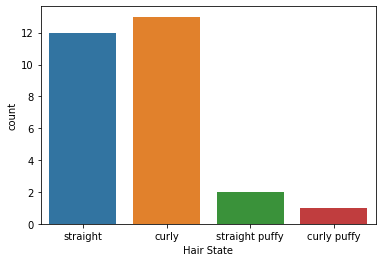

In [42]:
sns.countplot(x='Hair State',data=df)

##### The label does not contain equal number classes so this would decrease the accuracy of model!

### Encoding Variables

In [86]:
df1 = pd.get_dummies(df,drop_first=True,columns=['Comb or brush?', 'Wrapped hair?', 'Conditioner?', 'Oil'])

In [88]:
df1 = pd.get_dummies(df1,columns=['Hair State'])

In [89]:
df1.head(2)

,Date,Days since combed,Days since shampooed,Comb or brush?_comb,Comb or brush?_nothing,Wrapped hair?_yes,Conditioner?_yes,Oil_yes,Hair State_curly,Hair State_curly puffy,Hair State_straight,Hair State_straight puffy
0,2022-03-27,0,1,1,0,1,0,0,0,0,1,0
1,2022-03-28,1,2,0,1,1,0,0,1,0,0,0


In [90]:
df1.shape

(28, 12)

### Splitting in train test sets

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = df1.drop(['Hair State_curly','Hair State_curly puffy', 'Hair State_straight', 'Hair State_straight puffy','Date'],axis=1)

In [93]:
y = pd.DataFrame(df1,columns=['Hair State_curly', 'Hair State_curly puffy', 'Hair State_straight', 'Hair State_straight puffy'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Scaling Values using MinMaxScaler

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(X_train)

MinMaxScaler()

In [98]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Deep Learning Model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
X_train.shape

(18, 7)

In [104]:
model = Sequential()


model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=4,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [105]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [108]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/1600
1/1 [==============================] - 0s 38ms/step - loss: 1.1016 - val_loss: 1.1140
Epoch 2/1600
1/1 [==============================] - 0s 19ms/step - loss: 1.1111 - val_loss: 1.1137
Epoch 3/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0599 - val_loss: 1.1134
Epoch 4/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0912 - val_loss: 1.1132
Epoch 5/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.1396 - val_loss: 1.1130
Epoch 6/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.1240 - val_loss: 1.1128
Epoch 7/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.1180 - val_loss: 1.1126
Epoch 8/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0901 - val_loss: 1.1124
Epoch 9/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0929 - val_loss: 1.1121
Epoch 10/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.1278 - val_loss: 1.1119
Epoch 11/

1/1 [==============================] - 0s 17ms/step - loss: 1.0712 - val_loss: 1.0995
Epoch 84/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0754 - val_loss: 1.0989
Epoch 85/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.1066 - val_loss: 1.0983
Epoch 86/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0947 - val_loss: 1.0978
Epoch 87/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.1138 - val_loss: 1.0972
Epoch 88/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0696 - val_loss: 1.0966
Epoch 89/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0361 - val_loss: 1.0960
Epoch 90/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0277 - val_loss: 1.0956
Epoch 91/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0810 - val_loss: 1.0952
Epoch 92/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0382 - val_loss: 1.0947
Epoch 93/1600


1/1 [==============================] - 0s 19ms/step - loss: 1.0600 - val_loss: 1.0747
Epoch 165/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0857 - val_loss: 1.0744
Epoch 166/1600
1/1 [==============================] - 0s 17ms/step - loss: 0.9993 - val_loss: 1.0741
Epoch 167/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0171 - val_loss: 1.0738
Epoch 168/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0452 - val_loss: 1.0736
Epoch 169/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0375 - val_loss: 1.0733
Epoch 170/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0036 - val_loss: 1.0730
Epoch 171/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0393 - val_loss: 1.0726
Epoch 172/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0518 - val_loss: 1.0723
Epoch 173/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0377 - val_loss: 1.0720
Epoch

1/1 [==============================] - 0s 17ms/step - loss: 1.0146 - val_loss: 1.0573
Epoch 246/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0566 - val_loss: 1.0570
Epoch 247/1600
1/1 [==============================] - 0s 18ms/step - loss: 0.9537 - val_loss: 1.0567
Epoch 248/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0557 - val_loss: 1.0565
Epoch 249/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0007 - val_loss: 1.0563
Epoch 250/1600
1/1 [==============================] - 0s 17ms/step - loss: 0.9935 - val_loss: 1.0561
Epoch 251/1600
1/1 [==============================] - 0s 17ms/step - loss: 0.9919 - val_loss: 1.0560
Epoch 252/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0817 - val_loss: 1.0561
Epoch 253/1600
1/1 [==============================] - 0s 16ms/step - loss: 1.0340 - val_loss: 1.0560
Epoch 254/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.1062 - val_loss: 1.0560
Epoch

1/1 [==============================] - 0s 18ms/step - loss: 0.9645 - val_loss: 1.0473
Epoch 327/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0692 - val_loss: 1.0471
Epoch 328/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0697 - val_loss: 1.0470
Epoch 329/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0774 - val_loss: 1.0469
Epoch 330/1600
1/1 [==============================] - 0s 16ms/step - loss: 1.0459 - val_loss: 1.0469
Epoch 331/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0139 - val_loss: 1.0469
Epoch 332/1600
1/1 [==============================] - 0s 18ms/step - loss: 1.0202 - val_loss: 1.0468
Epoch 333/1600
1/1 [==============================] - 0s 18ms/step - loss: 0.9699 - val_loss: 1.0466
Epoch 334/1600
1/1 [==============================] - 0s 17ms/step - loss: 1.0196 - val_loss: 1.0464
Epoch 335/1600
1/1 [==============================] - 0s 17ms/step - loss: 0.9964 - val_loss: 1.0462
Epoch

<AxesSubplot:>

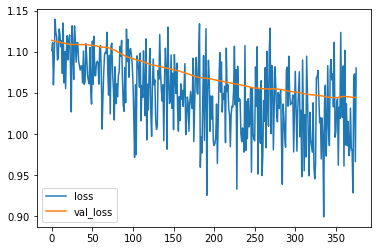

In [109]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [117]:
y_pred_class = model.predict_on_batch(X_test)

In [118]:
y_pred_class

array([[0.4942424 , 0.08429896, 0.30544636, 0.11601226],
       [0.45686272, 0.08810557, 0.33716807, 0.11786362],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235],
       [0.4070216 , 0.09256595, 0.38120472, 0.11920778],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235],
       [0.37976202, 0.09468014, 0.40618554, 0.11937228],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235],
       [0.36921978, 0.09543101, 0.4160269 , 0.11932235]], dtype=float32)

In [123]:
y_test

,Hair State_curly,Hair State_curly puffy,Hair State_straight,Hair State_straight puffy
9,1,0,0,0
25,1,0,0,0
8,1,0,0,0
21,0,0,1,0
0,0,0,1,0
12,1,0,0,0
17,0,0,1,0
22,0,0,1,0
11,0,1,0,0
13,1,0,0,0


### Now we compare y_pred_class (predicted by model) with y_test. The y_pred_ class contains probabilties for all possible 4 outcomes (summing each row gives us 1) so we consider the highest probability and match it with y_test.

### 50% accuracy as of now because the dataset contains less than 30 observations and the classes in label are not equally present (curly puffy and straight puffy are close to none)